<a href="https://colab.research.google.com/github/feltri08/Clasificacion-imagenes-de-alzheimer/blob/main/Proyecto_V_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<img src="https://raw.githubusercontent.com/diegortega98/AIproyect/main/aiportadaproyect.png" style="width:1800px;">


In [ ]:
# @title Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**<h3>Estas son las librerias que se utilizaran para la ejecución de todo el proyecto</h3>**

In [ ]:
# @title Librerias
#Librerias 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2
import os
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import *
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from tensorflow import keras
import tensorflow as tf


 **CLASES DEL DATASET**

Las clases del dataset se definen de la siguiente forma:


1.  NonDemented
2.  ModerateDemented
3.  MildDemented
4.  VeryMildDemented

El dataset a trabajar ya tiene las particiones de Train y Test.

Acontinuacion cargaremos los datos de Train para cada una de las clases: 

   

In [ ]:
#creamos dos listas para empezar a guardar las imagenes 
X_train=[] #lista con caracteristicas (imagenes)
y_train=[] #lista con etiquetas
X_train_Original=[]
y_train_Original=[]
dim = (200,200)  #Dimensiones para las imagenes que trabajaremos

In [ ]:
#especifica la ruta y lee el nombre de los documentos dentro de dicha carpeta para la primera clase
path_classes = '/content/drive/My Drive/ProyectoInteligencia/Alzheimer_s Dataset/train/NonDemented'
classes_names = os.listdir(path_classes)

#carga la imagenes
for i in classes_names:
  img = cv2.imread(path_classes+'/'+i)
  img = cv2.resize(img, dim)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  X_train.append(gray.flatten()) #guarda la imagen en la lista 
  y_train.append(0)  #0 NonDemented
  X_train_Original.append(gray.flatten()) #guarda la imagen en la lista 
  y_train_Original.append(0)  #0 NonDemented

<br>
<h3>Al tener tan pocas imagenes de la siguiente clase se procedera a rotarlas y reflejarlas para que no haya tanto desbalance de clases y pueda funcionar de una mejor manera.</h3>
<br>

In [ ]:
#especifica la ruta y lee el nombre de los documentos dentro de dicha carpeta para la segunda clase
path_classes = '/content/drive/My Drive/ProyectoInteligencia/Alzheimer_s Dataset/train/ModerateDemented'
classes_names = os.listdir(path_classes)

#carga la imagenes
F=0
temp=[]
for i in classes_names:
  F=F+1
  img = cv2.imread(path_classes+'/'+i)
  img = cv2.resize(img, dim)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
  temp.append(gray)
  X_train.append(gray.flatten()) #guarda la imagen en la lista 
  y_train.append(1)  #1 ModerateDemented
  X_train_Original.append(gray.flatten()) #guarda la imagen en la lista 
  y_train_Original.append(1)  #1 ModerateDemented
  
  #EFECTO ESPEJO
  imagenEspejo=np.fliplr(gray)
  X_train.append(imagenEspejo.flatten()) #guarda la imagen en la lista 
  y_train.append(1)  #1 ModerateDemented

#ROTACIÓN
width=200
height=200

for j in range(F):
  for k in range(20):
    rotationMatrix = cv2.getRotationMatrix2D((width/2, height/2), k/2, 1)
    rotationMatrix2 = cv2.getRotationMatrix2D((width/2, height/2), -k/2, 1)

    rotatedImage = cv2.warpAffine(temp[j], rotationMatrix, (width, height))
    rotatedImage2 = cv2.warpAffine(temp[j], rotationMatrix, (width, height))

    X_train.append(rotatedImage.flatten())
    X_train.append(rotatedImage2.flatten())

    y_train.append(1)  #1 ModerateDemented
    y_train.append(1)  #1 ModerateDemented

In [ ]:
#especifica la ruta y lee el nombre de los documentos dentro de dicha carpeta para la tercera clase
path_classes = '/content/drive/My Drive/ProyectoInteligencia/Alzheimer_s Dataset/train/MildDemented'
classes_names = os.listdir(path_classes)

#carga la imagenes
for i in classes_names:
  img = cv2.imread(path_classes+'/'+i)
  img = cv2.resize(img, dim)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
  X_train.append(gray.flatten()) #guarda la imagen en la lista 
  y_train.append(2)  #2 MildDemented
  X_train_Original.append(gray.flatten()) #guarda la imagen en la lista 
  y_train_Original.append(2)  #2 MildDemented

  #EFECTO ESPEJO
  imagenEspejo=np.fliplr(gray)
  X_train.append(imagenEspejo.flatten()) #guarda la imagen en la lista de forma reflejada 
  y_train.append(2)  #2 MildDemented

In [ ]:
#especifica la ruta y lee el nombre de los documentos dentro de dicha carpeta para la cuarta clase
path_classes = '/content/drive/My Drive/ProyectoInteligencia/Alzheimer_s Dataset/train/VeryMildDemented'
classes_names = os.listdir(path_classes)

#carga la imagenes
for i in classes_names:
  img = cv2.imread(path_classes+'/'+i)
  img = cv2.resize(img, dim)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
  X_train.append(gray.flatten()) #guarda la imagen en la lista 
  y_train.append(3)  #3 VeryMildDemented
  X_train_Original.append(gray.flatten()) #guarda la imagen en la lista 
  y_train_Original.append(3)  #3 VeryMildDemented

<br>
<h2>Para poder realizar las estimaciones necesitaremos permutar los datos de train.</h2>
<br>

In [ ]:
perm_Original = np.random.permutation(range(len(X_train_Original)))
X_train_Original=np.r_[X_train_Original]
y_train_Original=np.r_[y_train_Original]
X_train_Original=X_train_Original[perm_Original]
y_train_Original=y_train_Original[perm_Original]
print(X_train_Original.shape)

(5121, 40000)


In [ ]:
perm = np.random.permutation(range(len(X_train)))
X_train=np.r_[X_train]
y_train=np.r_[y_train]
X_train=X_train[perm]
y_train=y_train[perm]
print(X_train.shape)

(7970, 40000)


Visualizamos algunas de nuestras imágenes del dataset:

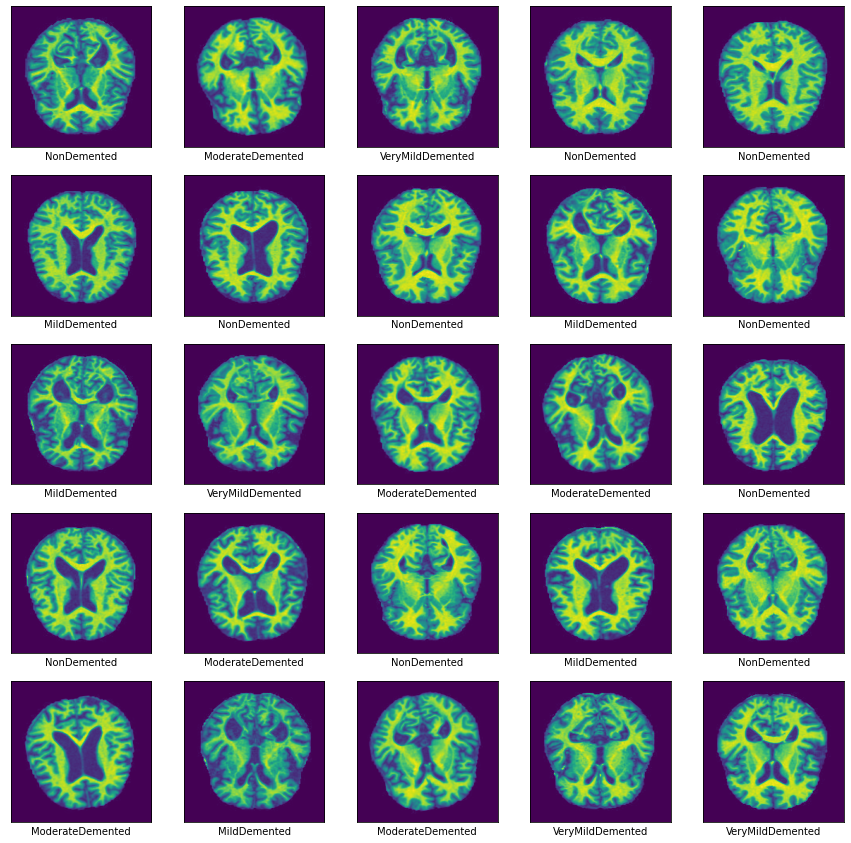

In [ ]:
class_names = ['NonDemented','ModerateDemented','MildDemented','VeryMildDemented']
plt.figure(figsize=(15,15))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i].reshape(200,200))
    plt.xlabel(class_names[y_train[i]])
  

A continuación se visualizara el numero de imágenes por cada clase. 

In [ ]:
# @title Imágenes Originales
print( "  clase   # de imágenes")
for i in np.unique(y_train_Original):
    print( "   ",int(i), "       ", np.sum(y_train_Original==i))

  clase   # de imágenes
    0         2560
    1         52
    2         717
    3         1792


In [ ]:
# @title Imágenes con data augmentation
print( "  clase   # de imágenes")
for i in np.unique(y_train):
    print( "   ",int(i), "       ", np.sum(y_train==i))

  clase   # de imágenes
    0         2560
    1         2184
    2         1434
    3         1792


<br><br>
<h3> En este momento realizaremos la carga de la parte de testeo del dataset <h3>

In [ ]:
# @title Test clase NonDemented
loadtest = '/content/drive/My Drive/ProyectoInteligencia/Alzheimer_s Dataset/test/NonDemented'
test = os.listdir(loadtest)

#creamos dos listas para empezar a guardar las imagenes 
X_test = [] #lista con imágenes de test
y_test = []
X_test_Original = [] #lista con imágenes de test
y_test_Original = []

for j in test:
  img_t = cv2.imread(loadtest +'/'+j)
  img_t = cv2.resize(img_t, dim)
  gray_t = cv2.cvtColor(img_t, cv2.COLOR_BGR2GRAY)  
  X_test.append(gray_t.flatten()) 
  y_test.append(0)  #0 NonDemented 
  X_test_Original.append(gray_t.flatten()) 
  y_test_Original.append(0)  #0 NonDemented

In [ ]:
# @title Test clase ModerateDemented
loadtest = '/content/drive/My Drive/ProyectoInteligencia/Alzheimer_s Dataset/test/ModerateDemented'
test = os.listdir(loadtest)
F=0
temp=[]
for k in test:
  F=F+1
  img_t = cv2.imread(loadtest +'/'+k)
  img_t = cv2.resize(img_t, dim)
  gray_t = cv2.cvtColor(img_t, cv2.COLOR_BGR2GRAY)  
  temp.append(gray_t)
  X_test.append(gray_t.flatten()) 
  y_test.append(1)  #1 ModerateDemented
  X_test_Original.append(gray_t.flatten()) 
  y_test_Original.append(1)  #1 ModerateDemented

#EFECTO ESPEJO
  imagenEspejo=np.fliplr(gray_t)
  X_test.append(imagenEspejo.flatten()) #guarda la imagen en la lista 
  y_test.append(1)  #1 ModerateDemented

#ROTACIÓN
width=200
height=200

for j in range(F):
  for k in range(20):
    rotationMatrix = cv2.getRotationMatrix2D((width/2, height/2), k/2, 1)
    rotationMatrix2 = cv2.getRotationMatrix2D((width/2, height/2), -k/2, 1)

    rotatedImage = cv2.warpAffine(temp[j], rotationMatrix, (width, height))
    rotatedImage2 = cv2.warpAffine(temp[j], rotationMatrix, (width, height))

    X_test.append(rotatedImage.flatten())
    X_test.append(rotatedImage2.flatten())

    y_test.append(1)  #1 ModerateDemented
    y_test.append(1)  #1 ModerateDemented

In [ ]:
# @title Test clase MildDemented
loadtest = '/content/drive/My Drive/ProyectoInteligencia/Alzheimer_s Dataset/test/MildDemented'
test = os.listdir(loadtest)

for j in test:
  img_t = cv2.imread(loadtest +'/'+j)
  img_t = cv2.resize(img_t, dim)
  gray_t = cv2.cvtColor(img_t, cv2.COLOR_BGR2GRAY)  
  X_test.append(gray_t.flatten()) 
  y_test.append(2)  #2 MildDemented
  X_test_Original.append(gray_t.flatten()) 
  y_test_Original.append(2)  #2 MildDemented

  #EFECTO ESPEJO
  imagenEspejo=np.fliplr(gray_t)
  X_test.append(imagenEspejo.flatten()) #guarda la imagen en la lista 
  y_test.append(2)  #2 MildDemented

In [ ]:
# @title Test clase VeryMildDemented
loadtest = '/content/drive/My Drive/ProyectoInteligencia/Alzheimer_s Dataset/test/VeryMildDemented'
test = os.listdir(loadtest)

for j in test:
  img_t = cv2.imread(loadtest +'/'+j)
  img_t = cv2.resize(img_t, dim)
  gray_t = cv2.cvtColor(img_t, cv2.COLOR_BGR2GRAY)  
  X_test.append(gray_t.flatten()) 
  y_test.append(3)  #3 VeryMildDemented
  X_test_Original.append(gray_t.flatten()) 
  y_test_Original.append(3)  #3 VeryMildDemented

<br>
<h2>Para poder realizar las estimaciones necesitaremos permutar los datos de test.</h2>
<br>

In [ ]:
# @title Permutación
perm_t = np.random.permutation(range(len(X_test)))
X_test=np.r_[X_test]
y_test=np.r_[y_test]
X_test=X_test[perm_t]
y_test=y_test[perm_t]
print(X_test.shape)

(1950, 40000)


In [ ]:
# @title Permutación
perm_t_Original = np.random.permutation(range(len(X_test_Original)))
X_test_Original=np.r_[X_test_Original]
y_test_Original=np.r_[y_test_Original]
X_test_Original=X_test_Original[perm_t_Original]
y_test_Original=y_test_Original[perm_t_Original]
print(X_test_Original.shape)

(1279, 40000)


<br><br>

<h1> Utilizaremos los métodos que vimos para decicidir cual será el mejor</h1>


**<h2>Gaussian NB Original</h2>**

In [ ]:
# @title Code
g_O = GaussianNB()
g_O.fit(X_train_Original, y_train_Original)
sG_O = cross_val_score(g_O, X_test_Original, y_test_Original, cv=KFold(5, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(sG_O), np.std(sG_O)))
print( "acierto en train", g_O.score(X_train_Original, y_train_Original))
print( "acierto en test ", g_O.score(X_test_Original, y_test_Original))


accuracy 0.525 (+/- 0.03247)
acierto en train 0.568638937707479
acierto en test  0.5340109460516028


**<h2>Gaussian NB  DA</h2>**

In [ ]:
# @title Code
g = GaussianNB()
g.fit(X_train, y_train)
sG = cross_val_score(g, X_test, y_test, cv=KFold(5, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(sG), np.std(sG)))
print( "acierto en train", g.score(X_train, y_train))
print( "acierto en test ", g.score(X_test, y_test))

accuracy 0.672 (+/- 0.01100)
acierto en train 0.6933500627352572
acierto en test  0.676923076923077


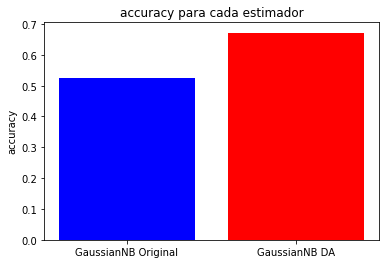

In [ ]:
# @title Gráfica Gaussian NB
estimadores = ["GaussianNB Original", "GaussianNB DA"] 
accuracy = [np.mean(sG_O), np.mean(sG)]
fig, ax = plt.subplots()
ax.set_ylabel('accuracy')
ax.set_title('accuracy para cada estimador')
plt.bar(estimadores, accuracy, color=['blue','red'])
plt.show()

<br><br> <h2> **SVC Original**

In [ ]:
# @title Code
svc_O = SVC()
svc_O.fit(X_train_Original, y_train_Original)
score_O = cross_val_score(svc_O, X_test_Original, y_test_Original, cv=KFold(5, shuffle=True), scoring=make_scorer(accuracy_score))

In [ ]:
print("accuracy score: %.3f (+/- %.5f)"%(np.mean(score_O ), np.std(score_O )))

accuracy score: 0.658 (+/- 0.03931)


<br><br> <h2> **SVC**

In [ ]:
svc = SVC()
svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
print( "acierto en train", svc.score(X_train, y_train))
print( "acierto en test ", svc.score(X_test, y_test))

acierto en train 0.914930991217064
acierto en test  0.5707692307692308


In [ ]:
predicciones_train = svc.predict(X_train)
predicciones_test  = svc.predict(X_test)

<h3>Presentaremos la matriz de confusión para una mejor visualización de las probabilidades</h3>

In [ ]:
# @title Code
score = cross_val_score(svc, X_test, y_test, cv=KFold(5, shuffle=True), scoring=make_scorer(accuracy_score))
cm_train = confusion_matrix(y_train, predicciones_train)
cm_test = confusion_matrix(y_test, predicciones_test)
print( "matrix de confusión en train\n", cm_train)
print("matrix de confusión en test\n", cm_test)
print( "verifica número de imágenes en total por fila")
print( np.sum(cm_test, axis=1))
print("accuracy score: %.3f (+/- %.5f)"%(np.mean(score), np.std(score)))

matrix de confusión en train
 [[2469    0    0   91]
 [   0 2170   14    0]
 [ 103    0 1180  151]
 [ 318    0    1 1473]]
matrix de confusión en test
 [[568   0   0  72]
 [155 228   3 118]
 [128   0 140  90]
 [270   0   1 177]]
verifica número de imágenes en total por fila
[640 504 358 448]
accuracy score: 0.790 (+/- 0.02696)


<br><br> <h2> **Decision Tree Classifier Original**

In [ ]:
# @title Code
from sklearn.tree import DecisionTreeClassifier
estDT_O = DecisionTreeClassifier()
estDT_O.fit(X_train_Original, y_train_Original)
sDT_O = cross_val_score(estDT_O, X_test_Original, y_test_Original, cv=KFold(5, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(sDT_O), np.std(sDT_O)))


accuracy 0.710 (+/- 0.01344)


<br><br> <h2> **Decision Tree Classifier DA**

In [ ]:
# @title Code
from sklearn.tree import DecisionTreeClassifier
estDT = DecisionTreeClassifier(max_depth=60)
estDT.fit(X_train, y_train)
estDT.predict(X_test)
sDT = cross_val_score(estDT, X_test, y_test, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(sDT), np.std(sDT)))

accuracy 0.833 (+/- 0.03309)


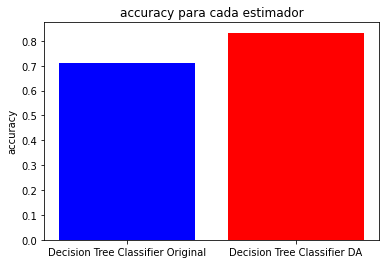

In [ ]:
# @title Gráfica Decision Tree Classifier
estimadores = ["Decision Tree Classifier Original", "Decision Tree Classifier DA"] 
accuracy = [np.mean(sDT_O), np.mean(sDT)]
fig, ax = plt.subplots()
ax.set_ylabel('accuracy')
ax.set_title('accuracy para cada estimador')
plt.bar(estimadores, accuracy, color=['blue','red'])
plt.show()

<br><br> <h2> **Random Forest Original**

In [ ]:
# @title Code
estRF_O = RandomForestClassifier()
estRF_O.fit(X_train_Original, y_train_Original)
srf_O = cross_val_score(estRF_O, X_test_Original, y_test_Original, cv=KFold(5, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(srf_O), np.std(srf_O)))


accuracy 0.919 (+/- 0.02244)


<br><br> <h2> **Random Forest DA**

In [ ]:
# @title Code
estRF = RandomForestClassifier()
estRF.fit(X_train, y_train)
predicciones = estRF.predict(X_test)
srf = cross_val_score(estRF, X_test, y_test, cv=KFold(5, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(srf), np.std(srf)))

accuracy 0.949 (+/- 0.01277)


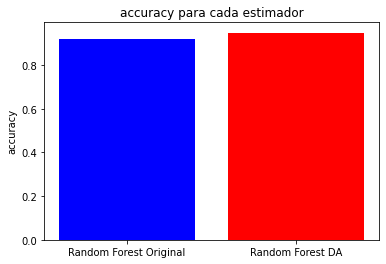

In [ ]:
# @title Gráfica Random Forest 
estimadores = ["Random Forest Original", "Random Forest DA"] 
accuracy = [np.mean(srf_O), np.mean(srf)]
fig, ax = plt.subplots()
ax.set_ylabel('accuracy')
ax.set_title('accuracy para cada estimador')
plt.bar(estimadores, accuracy, color=['blue','red'])
plt.show()

<br><br> <h2> **Pipeline Original**

In [ ]:
# @title Code
p_O = Pipeline((("pca", PCA(n_components=50)), ("classifier", SVC(kernel='rbf')) ))
sp_O = cross_val_score(p_O, X_test_Original, y_test_Original, cv=KFold(5, shuffle=True), scoring=make_scorer(accuracy_score))
print( "accuracy %.3f (+/- %.5f)"%(np.mean(sp_O), np.std(sp_O)))


accuracy 0.865 (+/- 0.02619)


<br><br> <h2> **Pipeline DA**

In [ ]:
# @title Code
p = Pipeline((("pca", PCA(n_components=50)), ("classifier", SVC(kernel='rbf')) ))
sp = cross_val_score(p, X_test, y_test, cv=KFold(5, shuffle=True), scoring=make_scorer(accuracy_score))
print( "accuracy %.3f (+/- %.5f)"%(np.mean(sp), np.std(sp)))

accuracy 0.885 (+/- 0.01757)


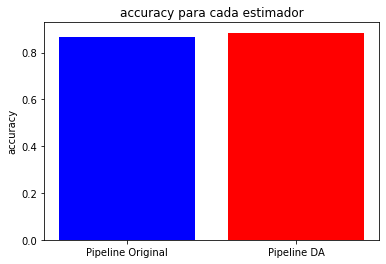

In [ ]:
# @title Gráfica Pipeline
estimadores = ["Pipeline Original", "Pipeline DA"] 
accuracy = [np.mean(sp_O), np.mean(sp)]
fig, ax = plt.subplots()
ax.set_ylabel('accuracy')
ax.set_title('accuracy para cada estimador')
plt.bar(estimadores, accuracy, color=['blue','red'])
plt.show()

<br><br><br><br>
<h1> Red neuronal Original</h1>

In [ ]:
class_names = ['NonDemented','ModerateDemented','MildDemented','VeryMildDemented']
NUM_CLASSES = len(class_names)

<h3>En esta apartado utilizaremos el Layers Dense para crear la red neuronal ya que nuestras imagenes han sido modificada mediante la función Flatten, por lo tanto solo utilizaremos un Layer con el shape que podemos visualizar</h3>

In [ ]:
def create_model_O():
  model_O = keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=X_train_Original[0].shape), #1 capa flatten aplane mi entrada
    tf.keras.layers.Dense(1000, activation=tf.nn.relu),
    tf.keras.layers.Dense(500, activation=tf.nn.relu),
    tf.keras.layers.Dense(250, activation=tf.nn.relu),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(NUM_CLASSES, activation=tf.nn.softmax) # capa de salida 
  ])
  model_O.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  model_O.summary()
  return model_O

<h3>Aca se utiliza la red neuronal anteriormente establecida</h3>

In [ ]:
modelo_O= None
modelo_O= create_model_O()
history_O = modelo_O.fit(X_train_Original, y_train_Original, epochs=40, batch_size=100, validation_data=(X_test_Original, y_test_Original))
test_loss_O, test_acc_O = modelo_O.evaluate(X_test_Original, y_test_Original)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 40000)             0         
_________________________________________________________________
dense_39 (Dense)             (None, 1000)              40001000  
_________________________________________________________________
dense_40 (Dense)             (None, 500)               500500    
_________________________________________________________________
dense_41 (Dense)             (None, 250)               125250    
_________________________________________________________________
dense_42 (Dense)             (None, 128)               32128     
_________________________________________________________________
dense_43 (Dense)             (None, 4)                 516       
Total params: 40,659,394
Trainable params: 40,659,394
Non-trainable params: 0
__________________________________________

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


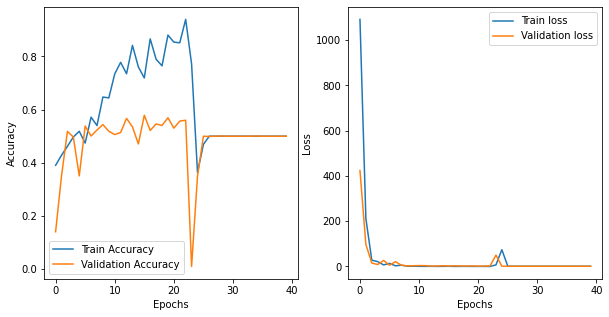

In [ ]:
# @title Gráfica Red original
print(history_O.history.keys())
fig = plt.figure(figsize = (10,5))
ax= fig.add_subplot(1,2,1)
ax.plot(history_O.history['accuracy'], label='Train Accuracy');
ax.plot(history_O.history['val_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
ax = fig.add_subplot(1,2,2)
ax.plot(history_O.history['loss'], label='Train loss');
ax.plot(history_O.history['val_loss'], label='Validation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');

<br><br><br><br>
<h1> Red neuronal Data Aumentation</h1>

<h3>En esta apartado utilizaremos el Layers Dense para crear la red neuronal ya que nuestras imagenes han sido modificada mediante la función Flatten, por lo tanto solo utilizaremos un Layer con el shape que podemos visualizar</h3>

In [ ]:
def create_model():
  model = keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=X_train[0].shape), #1 capa flatten aplane mi entrada
    tf.keras.layers.Dense(1000, activation=tf.nn.relu),
    tf.keras.layers.Dense(500, activation=tf.nn.relu),
    tf.keras.layers.Dense(250, activation=tf.nn.relu),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(NUM_CLASSES, activation=tf.nn.softmax) # capa de salida 
  ])
  model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  model.summary()
  return model


<h3>Aca se utiliza la red neuronal anteriormente establecida</h3>

In [ ]:
modelo= None
modelo= create_model()
history = modelo.fit(X_train, y_train, epochs=24, batch_size=100, validation_data=(X_test,y_test))
test_loss, test_acc = modelo.evaluate(X_test, y_test)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 40000)             0         
_________________________________________________________________
dense_44 (Dense)             (None, 1000)              40001000  
_________________________________________________________________
dense_45 (Dense)             (None, 500)               500500    
_________________________________________________________________
dense_46 (Dense)             (None, 250)               125250    
_________________________________________________________________
dense_47 (Dense)             (None, 128)               32128     
_________________________________________________________________
dense_48 (Dense)             (None, 4)                 516       
Total params: 40,659,394
Trainable params: 40,659,394
Non-trainable params: 0
__________________________________________

<h3>Aca podemos observar el comportamiento de la red neuronal mediante una grafica</h3>

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


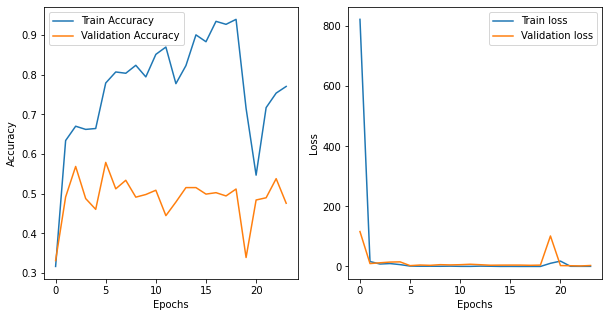

In [ ]:
# @title Gráfica Red DA
print(history.history.keys())
fig = plt.figure(figsize = (10,5))
ax= fig.add_subplot(1,2,1)
ax.plot(history.history['accuracy'], label='Train Accuracy');
ax.plot(history.history['val_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
ax = fig.add_subplot(1,2,2)
ax.plot(history.history['loss'], label='Train loss');
ax.plot(history.history['val_loss'], label='Validation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');

<h3>Aca observamos la comparación de cada uno de los estimadores utilizados en el caso de aumento de los datos.</h3>

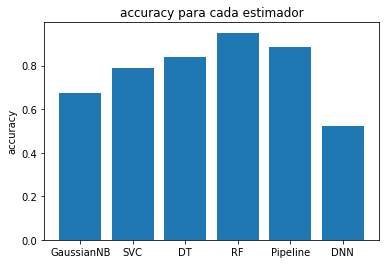

In [ ]:
estimadores = ["GaussianNB", "SVC", "DT", "RF", "Pipeline", "DNN"] 
accuracy = [np.mean(sG), np.mean(score),np.mean(sDT), np.mean(srf), np.mean(sp), np.mean(history.history['val_accuracy'])]
fig, ax = plt.subplots()
ax.set_ylabel('accuracy')
ax.set_title('accuracy para cada estimador')
plt.bar(estimadores, accuracy)
plt.show()


<br><br><h3>En la siguiente gráfica realizamos una comparación del accuracy de diferentes estimadores entre las imágenes dadas en el dataset, y las agragadas mediante Data Aumentation.<h3><br>



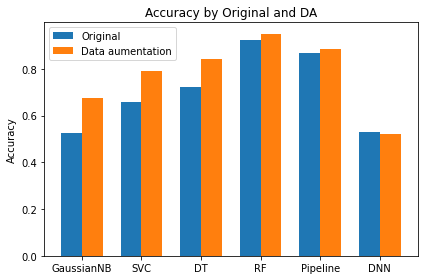

In [ ]:
# @title gráfica Comparación
labels = ["GaussianNB", "SVC", "DT", "RF", "Pipeline", "DNN"]
acc_O = [np.mean(sG_O), np.mean(score_O), np.mean(sDT_O),np.mean(srf_O), np.mean(sp_O), np.mean(history_O.history['val_accuracy'])]
acc_M = [np.mean(sG), np.mean(score),np.mean(sDT),np.mean(srf),np.mean(sp),np.mean(history.history['val_accuracy'])]

x = np.arange(len(labels))  # labels
width = 0.35  # anchura de las barras

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, acc_O, width, label='Original')
rects2 = ax.bar(x + width/2, acc_M, width, label='Data aumentation')

# 
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy by Original and DA')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


fig.tight_layout()

plt.show()

<br><br> <h2> A continuación haremos una prueba mediante unas predicciones utilizando el mejor estimador encontrado </h2> <br>

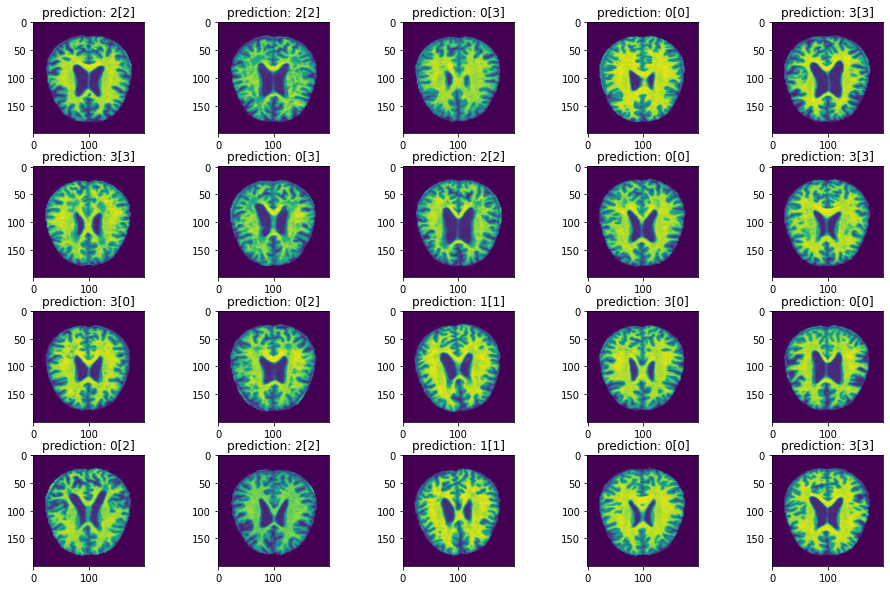

In [ ]:
# @title predicciones
plt.figure(1, figsize=(16,10))
n=0
for i in range(20):
  n += 1
  r = np.random.randint(0, X_test.shape[0], 1)
  plt.subplot(4, 5, n) #numero de filas y cantidad de columnas de la grafica
  plt.subplots_adjust(hspace = 0.3, wspace =0.2)
  plt.imshow(np.squeeze(X_test[r].reshape(200,200)))
  plt.title("prediction: "+str(int(estRF.predict(X_test[r]))) + str(y_test[r]))
plt.show()